In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
from scipy.optimize import curve_fit
from collections import defaultdict
from scipy.spatial.distance import cdist
mpl.rcParams['axes.linewidth'] = 2
from DEPENDENCIES.recycle import *
from svg2emf import svg2emf

# TRP density

In [2]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def fit_gaussian(x, y, nice_x=np.linspace(0,15,300), p0=(1,10,1)):
    n = len(x)                          #the number of data
    mean = sum(x*y)/n                   #note this correction
    sigma = sum(y*(x-mean)**2)/n        #note this correction
    popt,pcov = curve_fit(gaus,x,y,p0=p0)#[1,mean,sigma])
    print("Mean: {:.4f}\nStd: {:.4f}".format(*popt[1:]))
    res = gaus(nice_x,*popt)
    res /= np.max(res)
    return res

In [3]:
z = np.linspace(0,15,400)
mid5, mid6 = 5.6544, 9.72404 # bilayer midplane for gH-POPC*
g5_trp = read_text_file("DENS/gH-POPC5-46_PRO1_dens_TRP.xvg")
g6_trp = read_text_file("DENS/gH-POPC6-46_PRO1_dens_TRP.xvg")
g5_po4 = read_text_file("DENS/gH-POPC5-46_PRO1_dens_PO4.xvg")
g6_po4 = read_text_file("DENS/gH-POPC6-46_PRO1_dens_PO4.xvg")
g5_trp[:,1] /= np.max(g5_trp[:,1])
g6_trp[:,1] /= np.max(g6_trp[:,1])
g5_trp = fit_gaussian(*g5_trp.T, nice_x=z, p0=(1,8,1))
g6_trp = fit_gaussian(*g6_trp.T, nice_x=z, p0=(1,8,1))
g5_po4[:,1] /= np.max(g5_po4[:,1]) #1000 so curve_fit doesnt diverge
g6_po4[:,1] /= np.max(g6_po4[:,1])
g5_po4 = fit_gaussian(*g5_po4[g5_po4[:,0]>mid5].T, nice_x=z)
g6_po4 = fit_gaussian(*g6_po4[g6_po4[:,0]>mid6].T, nice_x=z)

Mean: 7.2868
Std: 0.2357
Mean: 7.8156
Std: 0.2122
Mean: 11.9399
Std: -0.7537
Mean: 11.8395
Std: 0.2861


gH with/without cholesterol


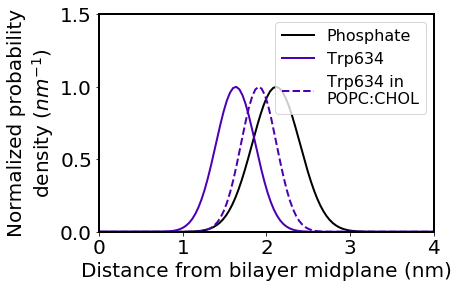

In [6]:
print("gH with/without cholesterol")
fig = plt.figure(figsize=(6,4))
ax = plt.axes()
ax.tick_params(labelsize=Z)
ax.set_xlim(0,4)
ax.set_ylim(0,1.5)
ax.set_xlabel("Distance from bilayer midplane (nm)", fontsize=Z)
ax.set_ylabel("Normalized probability\ndensity ($nm^{-1}$)", fontsize=Z)
#ax.plot(z-mid5, g5_po4, c=(0.7,0,0), lw=2, ls=':') 
ax.plot(z-mid6, g6_po4, c='k', lw=2, label="Phosphate")
ax.plot(z-mid5, g5_trp, c=(0.3,0,0.7), lw=2, label="Trp634")
ax.plot(-1*(z-mid6), g6_trp, c=(0.3,0,0.7), lw=2, ls='--', label="Trp634 in\nPOPC:CHOL")
ax.legend(fontsize=Z-4)
plt.show()
plt.close()

In [7]:
z = np.linspace(0,15,400)
mid5, mid6 = 9.74123, 11.1597 # bilayer midplane for gH-POPC*
n15_trp = read_text_file("DENS/NP61-POPC5-46_PRO3_dens_TRP.xvg")
n161_trp = read_text_file("DENS/NP61-POPC6-46_PRO1_dens_TRP1.xvg")
n162_trp = read_text_file("DENS/NP61-POPC6-46_PRO1_dens_TRP2.xvg")
n15_po4 = read_text_file("DENS/NP61-POPC5-46_PRO3_dens_PO4.xvg")
n161_po4 = read_text_file("DENS/NP61-POPC6-46_PRO1_dens_PO41.xvg")
n162_po4 = read_text_file("DENS/NP61-POPC6-46_PRO1_dens_PO42.xvg")
"""n15_trp = fit_gaussian(*n15_trp.T, nice_x=z)
n161_trp = fit_gaussian(*n161_trp.T, nice_x=z)
n162_trp = fit_gaussian(*n162_trp.T, nice_x=z)"""
#n15_po4[:,1] = n15_po4[:,1]/1000 #1000 so curve_fit doesnt diverge
n161_po4[:,1] = n161_po4[:,1]/1000
n162_po4[:,1] = n162_po4[:,1]/1000
n15_po4 = fit_gaussian(*n15_po4[n15_po4[:,0]>mid5].T, nice_x=z)
n161_po4 = fit_gaussian(*n161_po4[n161_po4[:,0]>mid6].T, nice_x=z)
n162_po4 = fit_gaussian(*n162_po4[n162_po4[:,0]>mid6].T, nice_x=z)

Mean: 11.4386
Std: 0.3739
Mean: 13.0480
Std: 0.3651
Mean: 12.0555
Std: 0.3238


gHNP with/without cholesterol


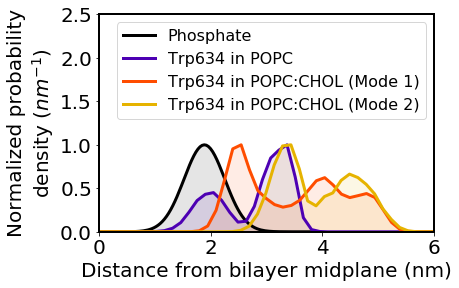

In [100]:
print("gHNP with/without cholesterol")
fig = plt.figure(figsize=(6,4))
ax = plt.axes()
ax.tick_params(labelsize=Z)
ax.set_xlim(0,6)
ax.set_ylim(0,2.5)
ax.set_xlabel("Distance from bilayer midplane (nm)", fontsize=Z)
ax.set_ylabel("Normalized probability\ndensity ($nm^{-1}$)", fontsize=Z)
ax.fill_between(z-mid6, n161_po4, facecolor='k', alpha=0.1)
ax.plot(z-mid6, n161_po4, lw=3, label="Phosphate", c='k')
ax.fill_between(-1*(n15_trp[:,0]-mid5), n15_trp[:,1]/np.max(n15_trp[:,1]), facecolor=(0.3,0,0.7), alpha=0.1)
ax.plot(-1*(n15_trp[:,0]-mid5), n15_trp[:,1]/np.max(n15_trp[:,1]), c=(0.3,0,0.7), lw=3, label="Trp634 in POPC")
ax.fill_between(-1*(n161_trp[:,0]-mid6), n161_trp[:,1]/np.max(n161_trp[:,1]), facecolor=(1,0.3,0), alpha=0.1)
ax.plot(-1*(n161_trp[:,0]-mid6), n161_trp[:,1]/np.max(n161_trp[:,1]), c=(1,0.3,0), lw=3, ls='-', label="Trp634 in POPC:CHOL (Mode 1)")
ax.fill_between(-1*(n162_trp[:,0]-mid6), n162_trp[:,1]/np.max(n162_trp[:,1]), facecolor=(0.9,0.7,0), alpha=0.1)
ax.plot(-1*(n162_trp[:,0]-mid6), n162_trp[:,1]/np.max(n162_trp[:,1]), c=(0.9,0.7,0), lw=3, ls='-', label="Trp634 in POPC:CHOL (Mode 2)")
ax.legend(fontsize=Z-4)
plt.show()
plt.close()

# TRP RDF from tails and water

In [12]:
g5_trp_rdf = read_text_file("RDFs/gH-POPC5-46_PRO1_rdf.sfu")
g6_trp_rdf = read_text_file("RDFs/gH-POPC6-46_PRO1_rdf.sfu")
n15_trp_rdf = read_text_file("RDFs/NP61-POPC5-46_PRO3_rdf.sfu")
n161_trp_rdf = read_text_file("RDFs/NP61-POPC6-46_PRO1_rdf1.sfu")
n162_trp_rdf = read_text_file("RDFs/NP61-POPC6-46_PRO1_rdf2.sfu")

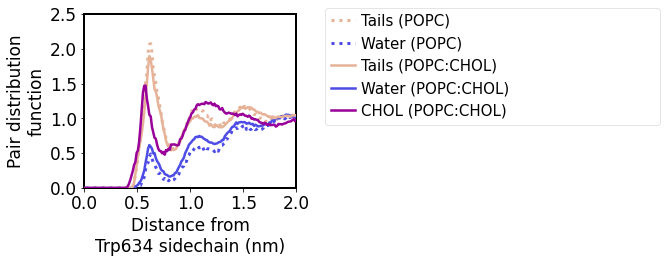

In [68]:
Z=17
fig = plt.figure(figsize=(3.8,3.2))
ax = plt.axes()
ax.tick_params(labelsize=Z)
ax.set_xlim(0,2)
ax.set_ylim(0,2.5)
ax.set_xlabel('Distance from\nTrp634 sidechain (nm)', fontsize=Z)
ax.set_ylabel('Pair distribution\nfunction', fontsize=Z)
ax.set_yticks(np.linspace(0,2.5,6))
ax.plot(g5_trp_rdf[:,0], g5_trp_rdf[:,1], lw=3, c=(0.9,0.7,0.6), ls=':', label="Tails (POPC)", zorder=5)
ax.plot(g5_trp_rdf[:,0], g5_trp_rdf[:,2], lw=3, c=(0.3,0.3,0.9), ls=':', label="Water (POPC)", zorder=6)
ax.plot(g6_trp_rdf[:,0], g6_trp_rdf[:,1], lw=2.5, c=(0.9,0.7,0.6), label="Tails (POPC:CHOL)", zorder=19)
ax.plot(g6_trp_rdf[:,0], g6_trp_rdf[:,2], lw=2.5, c=(0.3,0.3,0.9), label="Water (POPC:CHOL)", zorder=18)
ax.plot(g6_trp_rdf[:,0], g6_trp_rdf[:,3], lw=2.5, c=(0.6,0,0.6), label="CHOL (POPC:CHOL)", zorder=20)


ax.legend(fontsize=Z-2, ncol=1, bbox_to_anchor=(1.1, 0.45, 1.65, 0.5), loc='center', mode='expand', handletextpad=0.4, handlelength=1.6, framealpha=0.5)
#plt.savefig("Plots/gH-RDF.png", format='png', dpi=300, bbox_inches='tight', transparent=True)
plt.savefig("Plots/gH-RDF.svg", format='svg', bbox_inches='tight')
svg2emf("Plots/gH-RDF.svg")
plt.show()
plt.close()

In [99]:
print(g6_trp_rdf)

[[1.200e-02 0.000e+00 0.000e+00 0.000e+00]
 [2.400e-02 0.000e+00 0.000e+00 0.000e+00]
 [3.600e-02 0.000e+00 0.000e+00 0.000e+00]
 [4.800e-02 0.000e+00 0.000e+00 0.000e+00]
 [6.000e-02 0.000e+00 0.000e+00 0.000e+00]
 [7.200e-02 0.000e+00 0.000e+00 0.000e+00]
 [8.400e-02 0.000e+00 0.000e+00 0.000e+00]
 [9.600e-02 0.000e+00 0.000e+00 0.000e+00]
 [1.080e-01 0.000e+00 0.000e+00 0.000e+00]
 [1.200e-01 0.000e+00 0.000e+00 0.000e+00]
 [1.330e-01 0.000e+00 0.000e+00 0.000e+00]
 [1.450e-01 0.000e+00 0.000e+00 0.000e+00]
 [1.570e-01 0.000e+00 0.000e+00 0.000e+00]
 [1.690e-01 0.000e+00 0.000e+00 0.000e+00]
 [1.810e-01 0.000e+00 0.000e+00 0.000e+00]
 [1.930e-01 0.000e+00 0.000e+00 0.000e+00]
 [2.050e-01 0.000e+00 0.000e+00 0.000e+00]
 [2.170e-01 0.000e+00 0.000e+00 0.000e+00]
 [2.290e-01 0.000e+00 0.000e+00 0.000e+00]
 [2.410e-01 0.000e+00 0.000e+00 0.000e+00]
 [2.530e-01 0.000e+00 0.000e+00 0.000e+00]
 [2.650e-01 0.000e+00 0.000e+00 0.000e+00]
 [2.770e-01 0.000e+00 0.000e+00 0.000e+00]
 [2.890e-01

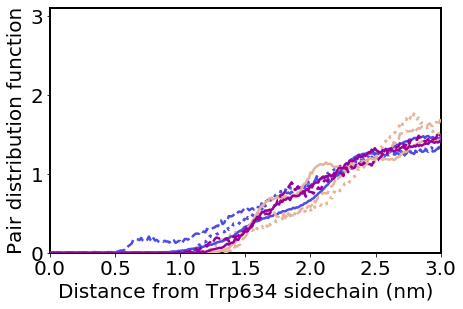

In [22]:
fig = plt.figure(figsize=(7,4.5))
ax = plt.axes()
ax.tick_params(labelsize=Z)
ax.set_xlim(0,3)
ax.set_ylim(0,3.1)
ax.set_xlabel('Distance from Trp634 sidechain (nm)', fontsize=Z)
ax.set_ylabel('Pair distribution function', fontsize=Z)
ax.plot(n162_trp_rdf[:,0], n162_trp_rdf[:,1], lw=2.5, c=(0.9,0.7,0.6), ls='--', label="Tails (POPC:CHOL) (Mode 1)", zorder=19)
ax.plot(n162_trp_rdf[:,0], n162_trp_rdf[:,2], lw=2.5, c=(0.3,0.3,0.9), ls='--', label="Water (POPC:CHOL) (Mode 1)", zorder=18)
ax.plot(n162_trp_rdf[:,0], n162_trp_rdf[:,3], lw=2.5, c=(0.6,0,0.6), ls='--', label="CHOL (POPC:CHOL) (Mode 1)", zorder=20)
ax.plot(n161_trp_rdf[:,0], n161_trp_rdf[:,1], lw=2.5, c=(0.9,0.7,0.6), label="Tails (POPC:CHOL) (Mode 1)", zorder=19)
ax.plot(n161_trp_rdf[:,0], n161_trp_rdf[:,2], lw=2.5, c=(0.3,0.3,0.9), label="Water (POPC:CHOL) (Mode 1)", zorder=18)
ax.plot(n161_trp_rdf[:,0], n161_trp_rdf[:,3], lw=2.5, c=(0.6,0,0.6), label="CHOL (POPC:CHOL) (Mode 1)", zorder=20)
ax.plot(n15_trp_rdf[:,0], n15_trp_rdf[:,1], lw=3, c=(0.9,0.7,0.6), ls=':', label="Tails (POPC)", zorder=5)
ax.plot(n15_trp_rdf[:,0], n15_trp_rdf[:,2], lw=3, c=(0.3,0.3,0.9), ls=':', label="Water (POPC)", zorder=6)
#ax.legend(fontsize=Z-5, ncol=2, bbox_to_anchor=(0., 0.58, 1, 0.5), loc='center', mode='expand')
plt.show()
plt.close()

# CORE RDF from chol and tails

In [4]:
n06_core_rdf = read_text_file("RDFs/NP610-POPC6-46_PRO1_rdfcore.sfu")
n162_core_rdf = read_text_file("RDFs/NP61-POPC6-46_PRO1_rdfcore2.sfu")

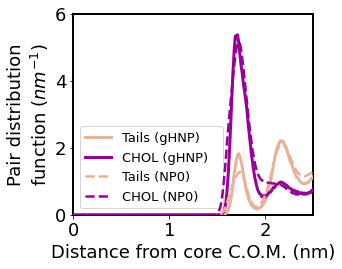

In [8]:
fig = plt.figure(figsize=(4.3,3.7))
ax = plt.axes()
ax.tick_params(labelsize=Z-2)
ax.set_xlim(0,2.5)
ax.set_ylim(0,6)
ax.set_xlabel('Distance from core C.O.M. (nm)', fontsize=Z-2)
ax.set_ylabel('Pair distribution\nfunction ($nm^{-1}$)', fontsize=Z-2)
ax.plot(n162_core_rdf[:,0], n162_core_rdf[:,1], lw=3, c=(0.9,0.7,0.6), ls='-', label="Tails (gHNP)", zorder=5)
#ax.plot(n162_core_rdf[:,0], n162_core_rdf[:,2], lw=3, c=(0.3,0.3,0.9), ls=':', label="Water (POPC)", zorder=6)
ax.plot(n162_core_rdf[:,0], n162_core_rdf[:,3], lw=3, c=(0.6,0.0,0.6), ls='-', label="CHOL (gHNP)", zorder=7)
ax.plot(n06_core_rdf[:,0], n06_core_rdf[:,1], lw=2.5, c=(0.9,0.7,0.6), ls='--', label="Tails (NP0)", zorder=18)
#ax.plot(n06_core_rdf[:,0], n06_core_rdf[:,2], lw=2.5, c=(0.3,0.3,0.9), label="Water (POPC:CHOL)", zorder=19)
ax.plot(n06_core_rdf[:,0], n06_core_rdf[:,3], lw=2.5, c=(0.6,0.0,0.6), ls='--', label="CHOL (NP0)", zorder=20)
ax.legend(fontsize=Z-7, ncol=1, bbox_to_anchor=(0., 0.0, 0.65, 0.88), loc='lower left', mode='expand')
#plt.savefig("Plots/gHNP-RDF.png", format='png', dpi=300, bbox_inches='tight', transparent=True)
plt.savefig("Plots/gHNP-RDF.svg", format='svg', bbox_inches='tight')
svg2emf("Plots/gHNP-RDF.svg")
plt.show()
plt.close()

In [5]:
n06_core_rdf

array([[1.200e-02, 0.000e+00, 0.000e+00, 0.000e+00],
       [2.400e-02, 0.000e+00, 0.000e+00, 0.000e+00],
       [3.600e-02, 0.000e+00, 0.000e+00, 0.000e+00],
       [4.800e-02, 0.000e+00, 0.000e+00, 0.000e+00],
       [6.000e-02, 0.000e+00, 0.000e+00, 0.000e+00],
       [7.200e-02, 0.000e+00, 0.000e+00, 0.000e+00],
       [8.400e-02, 0.000e+00, 0.000e+00, 0.000e+00],
       [9.600e-02, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.080e-01, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.200e-01, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.330e-01, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.450e-01, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.570e-01, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.690e-01, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.810e-01, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.930e-01, 0.000e+00, 0.000e+00, 0.000e+00],
       [2.050e-01, 0.000e+00, 0.000e+00, 0.000e+00],
       [2.170e-01, 0.000e+00, 0.000e+00, 0.000e+00],
       [2.290e-01, 0.000e+00, 0.000e+00, 0.000